In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\amrut\Downloads\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.head()

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
0,2.0,0,0,0,12209,1,1,0,0,0,1,1997,4.043051,8.535089
1,3.0,0,0,0,12209,1,1,0,0,0,1,1997,4.442651,8.517393
2,5.0,0,3,3,12209,1,1,1,1,1,0,2021,5.259732,8.653742
3,2.5,1,2,1,12209,1,1,0,0,0,1,1968,4.335197,8.638011
4,2.5,2,2,2,12209,1,1,1,0,0,1,2018,4.262680,8.443301


In [3]:
X = data.iloc[:, :-1]
y = data[['transform_price']]

In [4]:
y.columns

Index(['transform_price'], dtype='object')

In [5]:
X.shape, y.shape

((12743, 13), (12743, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [7]:
tf.random.set_seed(0)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(100, return_sequences = True),
    tf.keras.layers.SimpleRNN(80, return_sequences = True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1)
])
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [8]:
history=model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs=50, batch_size = 64)
predictions = model.predict(X_test)


Epoch 1/50
195/195 [==============================] - 3s 7ms/step - loss: 1.1029 - mae: 0.4767 - val_loss: 0.1512 - val_mae: 0.2773
Epoch 2/50
195/195 [==============================] - 1s 6ms/step - loss: 0.1225 - mae: 0.2578 - val_loss: 0.1249 - val_mae: 0.2490
Epoch 3/50
195/195 [==============================] - 1s 6ms/step - loss: 0.1144 - mae: 0.2495 - val_loss: 0.1240 - val_mae: 0.2608
Epoch 4/50
195/195 [==============================] - 1s 5ms/step - loss: 0.1145 - mae: 0.2505 - val_loss: 0.1170 - val_mae: 0.2486
Epoch 5/50
195/195 [==============================] - 1s 5ms/step - loss: 0.1115 - mae: 0.2467 - val_loss: 0.1186 - val_mae: 0.2475
Epoch 6/50
195/195 [==============================] - 1s 5ms/step - loss: 0.1111 - mae: 0.2465 - val_loss: 0.1138 - val_mae: 0.2440
Epoch 7/50
195/195 [==============================] - 1s 5ms/step - loss: 0.1129 - mae: 0.2487 - val_loss: 0.1176 - val_mae: 0.2471
Epoch 8/50
195/195 [==============================] - 1s 5ms/step - loss: 0.

In [9]:
predictions[:10], y_test.to_numpy()[:10]

(array([[8.617053 ],
        [8.312147 ],
        [8.412992 ],
        [8.0817175],
        [7.7605386],
        [8.803456 ],
        [8.655072 ],
        [8.389903 ],
        [8.578386 ],
        [8.716165 ]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ],
        [8.80751024],
        [8.25992587],
        [8.85311972],
        [8.44308082],
        [8.96784072]]))

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.08847078363543803, 0.22015778861989677)

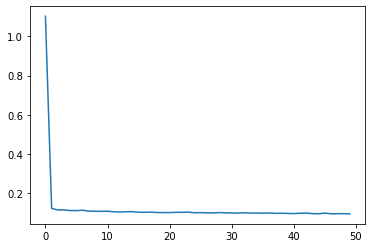

In [11]:
epochs = 150
plt.plot(range(0, len(history.history["loss"])), history.history["loss"][0:])

In [12]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim1 = str_to_float
#sqr_living_m2 = two_dim[-1][0]
#(two_dim)
#model.predict(two_dim)

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 3
Enter the value of total_floors : 3
Enter the value of bedroom : 1
Enter the value of pincode : 12203
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 0
Enter the value of Gaste-WC : 0
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1969
living_sq_m236.14


In [13]:
score = model.predict(pd.DataFrame(two_dim1))
score

array([[8.473679]], dtype=float32)

In [14]:
original_score = np.expm1(score) * np.expm1(two_dim1[-1][-1])
print('The price of house is {}'.format(original_score))

The price of house is [[172969.39]]


In [19]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim2 = str_to_float
#sqr_living_m2 = two_dim[-1][0]
#(two_dim)
#model.predict(two_dim)

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 3
Enter the value of total_floors : 3
Enter the value of bedroom : 1
Enter the value of pincode : 12489
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 0
Enter the value of Gaste-WC : 0
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1969
living_sq_m236.14


In [20]:
two_dim2

[[1.0,
  3.0,
  3.0,
  1.0,
  12489.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1969.0,
  3.61469455592456]]

In [21]:
score1 = model.predict(pd.DataFrame(two_dim2))
score1

array([[8.473679]], dtype=float32)

In [22]:
original_score = np.expm1(score1) * np.expm1(two_dim2[-1][-1])
print('The price of house is {}'.format(original_score))

The price of house is [[172969.39]]


In [40]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_sq_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim3 = str_to_float
print(two_dim3)
score3 = model.predict(pd.DataFrame(two_dim3))
original_score = np.expm1(score3) * np.expm1(two_dim3[-1][-1])
print('The price of house is {}'.format(original_score))

Enter the value of number_of_rooms : 2
Enter the value of floor_on : 2
Enter the value of total_floors : 5
Enter the value of bedroom : 1
Enter the value of pincode : 10439
Enter the value of balkon : 0
Enter the value of terrasse : 0
Enter the value of garten : 0
Enter the value of Gaste-WC : 0
Enter the value of Aufzug : 0
Enter the value of wohung : 1
Enter the value of construction_year : 1906
living_sq_m258.36
[[2.0, 2.0, 5.0, 1.0, 10439.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1906.0, 4.083620598859125]]
The price of house is [[284551.75]]


In [8]:
predictions[:10], y_test.to_numpy()[:10]

(array([[8.624985],
        [8.448158],
        [8.433627],
        [7.847938],
        [7.717858],
        [8.68112 ],
        [8.453493],
        [8.424903],
        [8.629133],
        [8.523428]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ],
        [8.80751024],
        [8.25992587],
        [8.85311972],
        [8.44308082],
        [8.96784072]]))

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.09521800298301904, 0.23610756083354892)

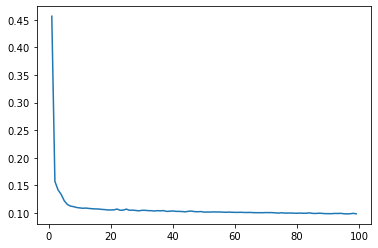

In [10]:
epochs = 150
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

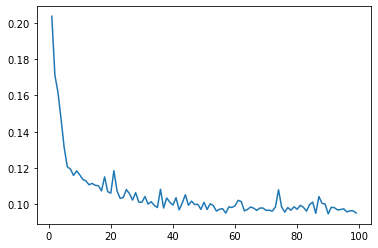

In [11]:
plt.plot(range(1, len(history.history["val_loss"])), history.history["val_loss"][1:])

In [12]:
model.evaluate(X_test, y_test)

319/319 [==============================] - 0s 122us/sample - loss: 0.0952 - mae: 0.2361


[0.09521800336839636, 0.23610754]

In [13]:
sq_ftt = X_test.head(10)
sqr_ft = sq_ftt['living_area_m2']

In [14]:
p = predictions[:10]
p = p.tolist()
y_test = y_test[:10]

y_t = y_test.to_numpy().tolist()
y_t, p

([[8.545002892000001],
  [8.370470412000001],
  [8.694841486],
  [7.717607289],
  [7.740394095],
  [8.807510236],
  [8.25992587],
  [8.853119722],
  [8.443080823999999],
  [8.967840722]],
 [[8.624984741210938],
  [8.448158264160156],
  [8.433627128601074],
  [7.847938060760498],
  [7.717857837677002],
  [8.681119918823242],
  [8.453493118286133],
  [8.42490291595459],
  [8.629133224487305],
  [8.523427963256836]])

In [15]:
for i, j, k in zip(y_t, sqr_ft, p):
    print('true',np.exp(i) * np.exp(j))
    print('pred',np.exp(k) * np.exp(j))

true [505103.25009856]
pred [547161.88716223]
true [263377.66665733]
pred [284654.69499346]
true [311023.10593111]
pred [239523.81485287]
true [494466.57537998]
pred [563298.86319285]
true [427684.37845084]
pred [418153.76874746]
true [382740.51652174]
pred [337298.04291468]
true [258931.78743056]
pred [314232.10674791]
true [457060.51131931]
pred [297852.67527026]
true [459640.83683441]
pred [553630.66541855]
true [806948.48014018]
pred [517415.93436624]


In [18]:
array = []
for i in data.columns[:-1]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('cs'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
sqr_living_m2 = two_dim[-1][-1]
score = model.predict([[2.0, 2.0, 2.0, 2.0, 12209.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1980.0, 4.04]])
score
original_score = np.expm1(score) * np.expm1(sqr_living_m2)
print('The price of house is {}'.format(original_score))

Enter the value of number_of_rooms : 2
Enter the value of floor_on : 2
Enter the value of total_floors : 2
Enter the value of bedroom : 2
Enter the value of pincode : 12209
Enter the value of balkon : 2
Enter the value of terrasse : 1
Enter the value of garten : 2
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1980
Enter the value of living_area_m2 : 4.04
The price of house is [[ 6524.77  ]
 [ 6524.77  ]
 [ 6524.77  ]
 [ 6524.77  ]
 [ 2157.3552]
 [ 6524.77  ]
 [10122.574 ]
 [ 6524.77  ]
 [10122.574 ]
 [10122.574 ]
 [10122.574 ]
 [ 2157.3552]
 [ 3599.7964]]


In [24]:
two_dim

[[2.0, 2.0, 2.0, 2.0, 12209.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1980.0, 4.04]]

In [28]:
score = model.predict([[2.0, 2.0, 2.0, 2.0, 12209.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1980.0, 4.04]])
score

array([[4.743361 ],
       [4.743361 ],
       [4.743361 ],
       [4.743361 ],
       [3.6366384],
       [4.743361 ],
       [5.1825233],
       [4.743361 ],
       [5.1825233],
       [5.1825233],
       [5.1825233],
       [3.6366384],
       [4.1486325]], dtype=float32)